In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from matplotlib import font_manager as fm

font_location = 'C:\\WINDOWS\\Fonts\\NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
# rc('font', family=font_name)

In [7]:
df = pd.read_csv("./Suwon0324_0414.csv",encoding="cp949")

In [8]:
df.head()

,날짜,평균기온,최고기온,최저기온,강수량
0,2025-03-24,14.0,22.4,6.2,0.0
1,2025-03-25,12.7,20.5,5.7,0.0
2,2025-03-26,14.7,23.5,7.6,2.1
3,2025-03-27,14.7,23.0,7.7,0.2
4,2025-03-28,16.6,25.6,9.4,0.0


1) 유효적산온도 = max [ (최고온도+최저온도)/2 - T_base ]  ~ T_base: 최저 한계온도

2) T_base: 감자 5도 [1], 상추 4도 [2] 
  발아 적산온도: 감자 260도 [1], 상추 70도 [2]

[1] 심상인, 박철수, 조진웅, & 우선희. (2019). 식용작물학. 향문사.

[2] Cha, M.-K., Kim, C.-S., Austin, J., & Cho, Y.-Y. (2014, March 1). Comparison of Cardinal Temperatures of Lettuce Using Bilinear, Parabolic, and Beta Distribution Functions. Protected horticulture and Plant Factory. The Korean Society for Bio-Environment Control. https://doi.org/10.12791/ksbec.2014.23.1.039


In [18]:
lettuce_daily = np.maximum(0, (df["최고기온"] + df["최저기온"])/2 - 4)
potato_daily = np.maximum(0, (df["최고기온"] + df["최저기온"])/2 - 5)

In [13]:
lettuce_GDD = lettuce_daily.cumsum()
potato_GDD = lettuce_daily.cumsum()

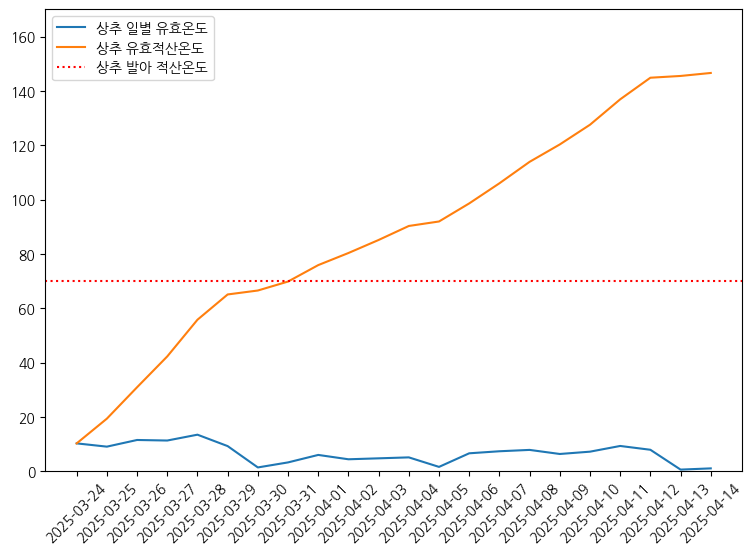

In [41]:
plt.figure(figsize = (9,6))

plt.plot(df["날짜"],lettuce_daily,label = "상추 일별 유효온도")

plt.plot(df["날짜"],lettuce_GDD,label = "상추 유효적산온도")

plt.axhline(y=70, color='r', linestyle='dotted', label = "상추 발아 적산온도")  


plt.legend()
plt.xticks(rotation=45)
plt.ylim(0,170)

plt.show()

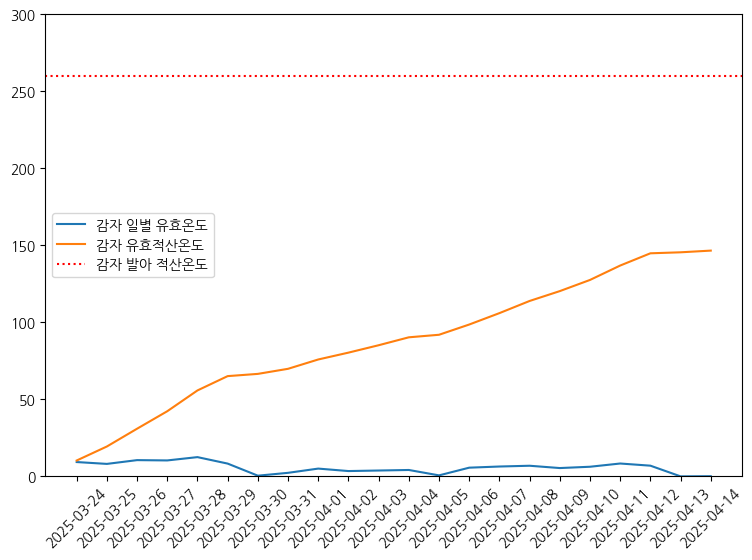

In [56]:
plt.figure(figsize = (9,6))

plt.plot(df["날짜"],potato_daily,label = "감자 일별 유효온도")

plt.plot(df["날짜"],potato_GDD,label = "감자 유효적산온도")

plt.axhline(y=260, color='r', linestyle='dotted', label = "감자 발아 적산온도")  

plt.legend()
plt.xticks(rotation=45)
plt.ylim(0,300)

plt.show()

In [45]:
rain = df["강수량"]
rain_cumsum = rain.cumsum()

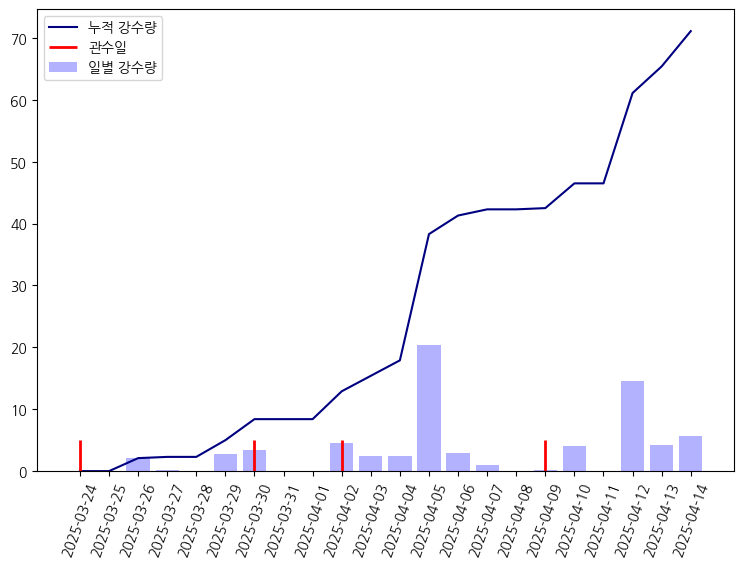

In [54]:
plt.figure(figsize = (9,6))
plt.bar(df['날짜'],rain, label = "일별 강수량",alpha = 0.3,color = "blue")
plt.plot(df['날짜'],rain_cumsum, label = "누적 강수량", color = "navy")
irrigation_dates= ["2025-03-24","2025-03-30","2025-04-02","2025-04-09"]
plt.vlines(x= irrigation_dates ,
            ymin=0, ymax=5, color='red', linewidth=2, label = "관수일")


plt.xticks(rotation=70)
plt.legend()
plt.show()